In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.decomposition import PCA
import mpl_toolkits.mplot3d

scaledFeatures = pd.read_csv("../../data/sets/insurance_features_scaled.csv")
sb.set()

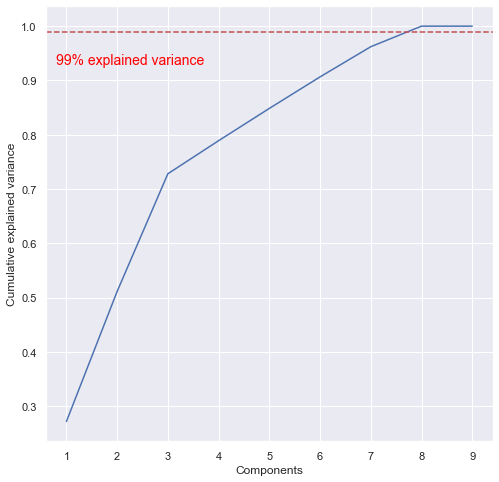

In [37]:
### Measure cumulative explained variance of principal components ###

pca = PCA()
pca.fit(scaledFeatures)
cumulativeVar = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize = (8, 8))
plt.plot(range(1, pca.n_components_ + 1), [cumulativeVar[i] for i in range(len(cumulativeVar))])
plt.xlabel('Components')
plt.ylabel('Cumulative explained variance');

plt.axhline(y = 0.99, color='r', linestyle='--')
plt.text(0.8, .93, '99% explained variance', color = 'red', fontsize=14)
plt.show()

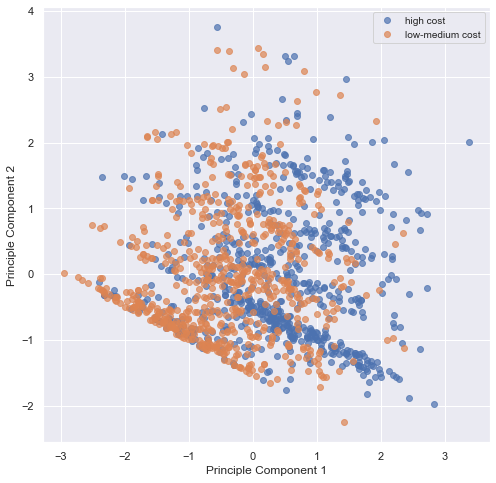

In [38]:
### Plot two principal components ###

cleanInsurance = pd.read_csv("../../data/sets/insurance_clean.csv")
chargesSeparator = cleanInsurance["charges"].median()
labels = np.where(cleanInsurance["charges"] > chargesSeparator, "high cost", "low-medium cost")

pca = PCA(n_components = 2)
components = pca.fit_transform(scaledFeatures)

principalDf = pd.DataFrame(data = components, columns = ["PC1", "PC2"]) 
principalDf["label"] = labels

plt.figure(figsize = (8, 8))
for key, group in principalDf.groupby(["label"]):
    plt.plot(group.PC1, group.PC2, "o", alpha = 0.7, label = key)
plt.legend(fontsize = 10)
plt.margins(0.05)
plt.xlabel("Principle Component 1")
plt.ylabel("Principle Component 2")
plt.show()

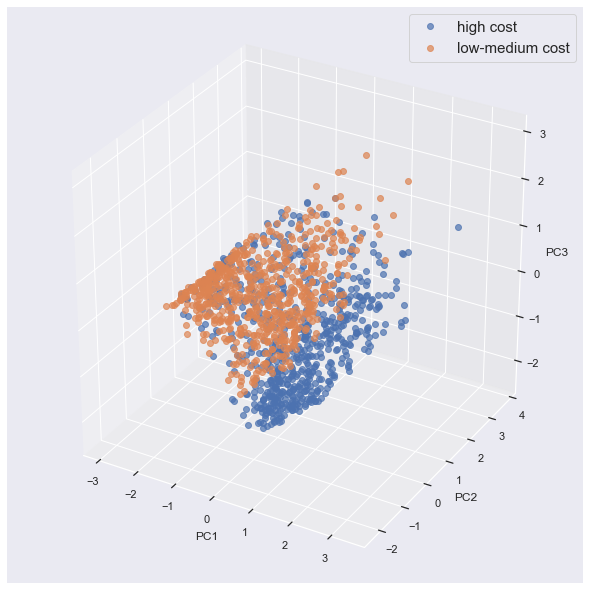

In [39]:
### Plot three principal components ###

pca = PCA(n_components = 3)
components = pca.fit_transform(scaledFeatures)

principalDf = pd.DataFrame(data = components, columns = ["PC1","PC2","PC3"]) 
principalDf["label"] = labels

fig = plt.figure(1, figsize=(8, 8))
ax = mpl_toolkits.mplot3d.Axes3D(fig)
for key, group in principalDf.groupby(['label']):
    ax.plot(group.PC1, group.PC2, group.PC3, 'o', alpha = 0.7, label = key)
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend(fontsize = 15)
plt.show()